# Conditional GAN으로 생성 컨트롤하기

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torchvision.utils import save_image
import matplotlib.pyplot as plt

In [40]:
torch.manual_seed(1)    # reproducible

In [56]:
# Hyper Parameters
EPOCHS = 100
BATCH_SIZE = 100
USE_CDA = torch.cuda.is_available()
DEVICE = -1#torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

Using Device: -1


In [57]:
# Fashion MNIST digits dataset
trainset = datasets.FashionMNIST('./.data',
    train=True,
    download=True,
    transform=transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
    ]))
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True)

In [60]:
def one_hot_embedding(labels, num_classes):
    y = torch.eye(num_classes) 
    return y[labels]

In [61]:
# Discriminator
D = nn.Sequential(
        nn.Linear(784, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid())

In [62]:
# Generator 
G = nn.Sequential(
        nn.Linear(64 + 10, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 784),
        nn.Tanh())

In [63]:

# Device setting
# D = D.to(DEVICE)
# G = G.to(DEVICE)

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100], Step [200/600], d_loss: 0.2035, g_loss: 3.9137, D(x): 0.96, D(G(z)): 0.14
Epoch [0/100], Step [400/600], d_loss: 0.0542, g_loss: 4.0524, D(x): 0.99, D(G(z)): 0.04
Epoch [0/100], Step [600/600], d_loss: 0.0192, g_loss: 5.1181, D(x): 0.99, D(G(z)): 0.01
Epoch [1/100], Step [200/600], d_loss: 0.0808, g_loss: 5.1402, D(x): 0.96, D(G(z)): 0.01
Epoch [1/100], Step [400/600], d_loss: 0.0702, g_loss: 4.7745, D(x): 0.97, D(G(z)): 0.02
Epoch [1/100], Step [600/600], d_loss: 0.0312, g_loss: 6.6559, D(x): 0.98, D(G(z)): 0.00
Epoch [2/100], Step [200/600], d_loss: 0.0587, g_loss: 5.9569, D(x): 0.98, D(G(z)): 0.01
Epoch [2/100], Step [400/600], d_loss: 0.0221, g_loss: 7.4173, D(x): 0.99, D(G(z)): 0.00
Epoch [2/100], Step [600/600], d_loss: 0.0687, g_loss: 5.2643, D(x): 0.98, D(G(z)): 0.04
Epoch [3/100], Step [200/600], d_loss: 0.0520, g_loss: 8.1650, D(x): 0.99, D(G(z)): 0.03
Epoch [3/100], Step [400/600], d_loss: 0.0428, g_loss: 4.2432, D(x): 1.00, D(G(z)): 0.04
Epoch [3/100], Step [

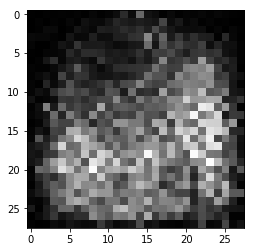

Epoch [9/100], Step [200/600], d_loss: 0.1385, g_loss: 6.0198, D(x): 0.95, D(G(z)): 0.01


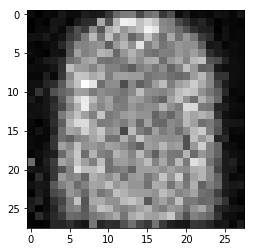

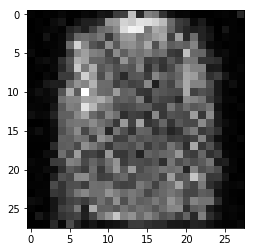

Epoch [9/100], Step [400/600], d_loss: 0.3028, g_loss: 3.1371, D(x): 0.91, D(G(z)): 0.06


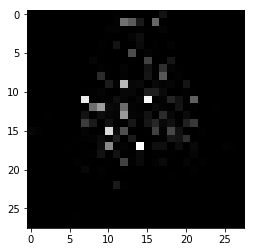

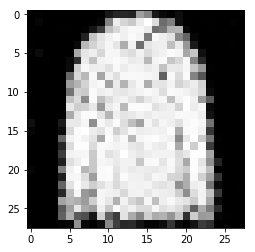

Epoch [9/100], Step [600/600], d_loss: 0.2114, g_loss: 4.0104, D(x): 0.92, D(G(z)): 0.04


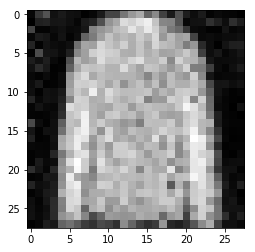

Epoch [10/100], Step [200/600], d_loss: 0.1456, g_loss: 5.0011, D(x): 0.96, D(G(z)): 0.07
Epoch [10/100], Step [400/600], d_loss: 0.1838, g_loss: 4.4171, D(x): 0.94, D(G(z)): 0.08
Epoch [10/100], Step [600/600], d_loss: 0.3961, g_loss: 3.3184, D(x): 0.86, D(G(z)): 0.07
Epoch [11/100], Step [200/600], d_loss: 0.3092, g_loss: 3.9105, D(x): 0.90, D(G(z)): 0.09
Epoch [11/100], Step [400/600], d_loss: 0.4723, g_loss: 3.8885, D(x): 0.84, D(G(z)): 0.09
Epoch [11/100], Step [600/600], d_loss: 0.3135, g_loss: 3.1948, D(x): 0.93, D(G(z)): 0.12
Epoch [12/100], Step [200/600], d_loss: 0.3178, g_loss: 4.5334, D(x): 0.90, D(G(z)): 0.08
Epoch [12/100], Step [400/600], d_loss: 0.5013, g_loss: 3.7907, D(x): 0.83, D(G(z)): 0.08
Epoch [12/100], Step [600/600], d_loss: 0.3071, g_loss: 3.5431, D(x): 0.94, D(G(z)): 0.16
Epoch [13/100], Step [200/600], d_loss: 0.4607, g_loss: 3.3709, D(x): 0.85, D(G(z)): 0.11
Epoch [13/100], Step [400/600], d_loss: 0.7608, g_loss: 3.8773, D(x): 0.79, D(G(z)): 0.08
Epoch [13/

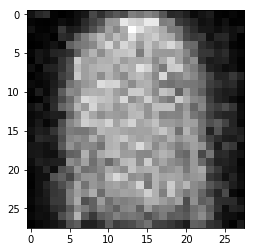

Epoch [19/100], Step [200/600], d_loss: 0.3952, g_loss: 4.1515, D(x): 0.86, D(G(z)): 0.08


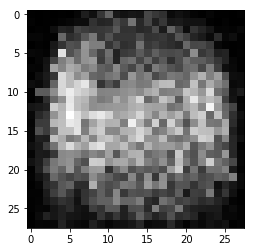

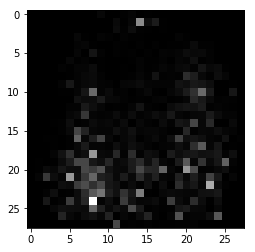

Epoch [19/100], Step [400/600], d_loss: 0.4642, g_loss: 2.5844, D(x): 0.87, D(G(z)): 0.18


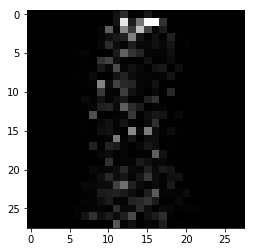

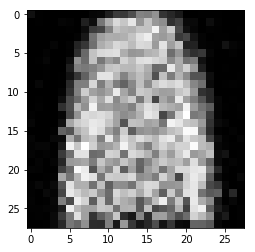

Epoch [19/100], Step [600/600], d_loss: 0.6806, g_loss: 2.8578, D(x): 0.90, D(G(z)): 0.32


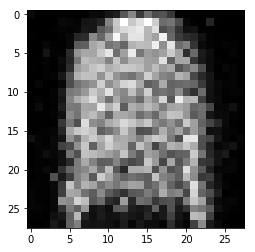

Epoch [20/100], Step [200/600], d_loss: 0.3973, g_loss: 2.5558, D(x): 0.91, D(G(z)): 0.17
Epoch [20/100], Step [400/600], d_loss: 0.6671, g_loss: 2.9228, D(x): 0.82, D(G(z)): 0.15
Epoch [20/100], Step [600/600], d_loss: 0.3758, g_loss: 2.5956, D(x): 0.91, D(G(z)): 0.18
Epoch [21/100], Step [200/600], d_loss: 0.3417, g_loss: 3.5634, D(x): 0.86, D(G(z)): 0.10
Epoch [21/100], Step [400/600], d_loss: 0.4332, g_loss: 2.9738, D(x): 0.87, D(G(z)): 0.15
Epoch [21/100], Step [600/600], d_loss: 0.4375, g_loss: 2.7782, D(x): 0.84, D(G(z)): 0.07
Epoch [22/100], Step [200/600], d_loss: 0.4174, g_loss: 3.9002, D(x): 0.82, D(G(z)): 0.05


In [ ]:
total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, label) in enumerate(train_loader):
        images = images.reshape(BATCH_SIZE, -1)#.to(DEVICE)
        
        real_labels = torch.ones(BATCH_SIZE, 1)#.to(DEVICE)
        fake_labels = torch.zeros(BATCH_SIZE, 1)#.to(DEVICE)

        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        class_label = one_hot_embedding(label, 10)
        z = torch.randn(BATCH_SIZE, 64)#.to(DEVICE)
        
        generator_input = torch.cat([z, class_label], 1)
        
        fake_images= G(generator_input)

        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # Train Generator

        # Compute loss with fake images
        fake_images = G(generator_input)
        outputs = D(fake_images)
        
        g_loss = criterion(outputs, real_labels)
        
        # Backprop and optimize
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, EPOCHS, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        if (epoch+1) % 10 == 0 and (i+1) % 100 == 0 :
            fake_images = np.reshape(fake_images.data.numpy()[0],(28, 28))
            plt.imshow(fake_images, cmap = 'gray')
            plt.show()